BERT - YN (Question + Answer)

Importing Libraries

In [ ]:
pip install tensorflow_text

     |████████████████████████████████| 4.9 MB 3.7 MB/s 


In [ ]:
import tensorflow as tf
import keras
import tensorflow_hub as hub
import tensorflow_text as text

Load the Train Data

In [ ]:
import pandas as pd
import numpy as np
df = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_train.xlsx')
df.head(5)

,Unnamed: 0,id,context,question-X,canquestion-X,answer-Y,judgements,goldstandard1,goldstandard2
0,1307,1307,X and Y are childhood neighbours who unexpecte...,Will you be going to the big New Year's Eve pa...,I will be going to the big New Year 's Eve par...,I have not made plans yet.,"Probably no#In the middle, neither yes nor no#...","In the middle, neither yes nor no","In the middle, neither yes nor no"
1,28437,28437,X wants to know what activities Y likes to do ...,Do you enjoy water sports?,I enjoy water sports .,I surf.,Probably yes / sometimes yes#Yes#Probably yes ...,Yes,Yes
2,18227,18227,X wants to know about Y's music preferences.,Have you heard Mozart?,I have heard Mozart .,Of course,Yes#Yes#Yes#Yes#Yes,Yes,Yes
3,8659,8659,X wants to know about Y's music preferences.,Have you ever listened to Papa Roach?,I have ever listened to Papa Roach .,I have not heard of Papa Roach,No#No#No#No#No,No,No
4,20999,20999,X and Y are childhood neighbours who unexpecte...,Have you been well?,I have been well .,I was sick last week with a cold.,Probably no#No#No#No#No,No,No


In [ ]:
df['goldstandard2'] = df['goldstandard2'].replace(np.nan, 'N/A')
df['goldstandard1'] = df['goldstandard1'].replace(np.nan, 'N/A')
df['goldstandard2'] = df['goldstandard2'].astype(str)
df['goldstandard1'] = df['goldstandard1'].astype(str)

In [ ]:
df['goldstandard2'].value_counts()

Yes                                  9940
No                                   7674
Yes, subject to some conditions      1598
In the middle, neither yes nor no     581
N/A                                   480
Other                                 287
Name: goldstandard2, dtype: int64

In [ ]:
df['YN'] = df['question-X'] + '[SEP]' + df['answer-Y']

In [ ]:
df = df[['YN','goldstandard2']].copy()

In [ ]:
# Multi Class Classification 
y = pd.get_dummies(df.goldstandard2, prefix='goldstandard2')
y

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,1,0,0,0,0,0
1,0,0,0,0,1,0
2,0,0,0,0,1,0
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
20555,0,0,1,0,0,0
20556,0,0,1,0,0,0
20557,0,0,1,0,0,0
20558,0,0,0,0,1,0


Laod the BERT Preprocessor and Encoders

In [ ]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3", trainable=True)
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4", trainable=True)

Design Architecture

In [ ]:
# Bert layers
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text') # Textual input layer
preprocessed_text = bert_preprocess(text_input) # The preprocessing of text
outputs = bert_encoder(preprocessed_text) # Encoded o/p

# Neural network layers
# l = tf.keras.layers.Dense(50, activation='sigmoid', name="output")(outputs['pooled_output'])
# l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(l)

l = tf.keras.layers.Dense(6, activation='softmax', name="soft_output")(outputs['pooled_output'])

# Use inputs and outputs to construct a final model
model = tf.keras.Model(inputs=[text_input], outputs = [l])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


ERROR:absl:hub.KerasLayer is trainable but has zero trainable weights.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: module, class, method, function, traceback, frame, or code object was expected, got cython_function_or_method
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


Cause: while/else statement not yet supported
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 text (InputLayer)              [(None,)]            0           []                               
                                                                                                  
 keras_layer (KerasLayer)       {'input_mask': (Non  0           ['text[0][0]']                   
                                e, 128),                                                          
                                 'input_word_ids':                                                
                                (None, 128),                                                      
                                 'input_type_ids':                                                
                                (None, 128)}                                                  

In [ ]:
import keras
METRICS = [
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall')
]

optimizer = tf.keras.optimizers.Adam(0.00003)
optimizer.learning_rate.assign(0.00003)
model.compile(optimizer=optimizer,
              loss='CategoricalCrossentropy',
              metrics=METRICS)

Training

In [ ]:
model.fit(df['YN'], y, epochs=3, batch_size=32)

Epoch 1/3
643/643 [==============================] - 338s 505ms/step - loss: 0.6997 - accuracy: 0.9209 - precision: 0.7875 - recall: 0.7195
Epoch 2/3
643/643 [==============================] - 325s 505ms/step - loss: 0.4370 - accuracy: 0.9528 - precision: 0.8740 - recall: 0.8378
Epoch 3/3
643/643 [==============================] - 325s 505ms/step - loss: 0.2896 - accuracy: 0.9702 - precision: 0.9230 - recall: 0.8961


Loading Validation Data

In [ ]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_validate.xlsx')
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard1'] = df_valid['goldstandard1'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['goldstandard1'] = df_valid['goldstandard1'].astype(str)
df_valid['YN'] = df_valid['question-X'] + '[SEP]' + df_valid['answer-Y']
df_valid = df_valid[['YN','goldstandard2']].copy()
df_valid.head(5)

# Multi Class Classification 
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='goldstandard2')
# y_valid

In [ ]:
model.evaluate(df_valid['YN'], y_valid)

215/215 [==============================] - 42s 193ms/step - loss: 0.5272 - accuracy: 0.9524 - precision: 0.8645 - recall: 0.8472


[0.5272201299667358,
 0.9524123072624207,
 0.8645228743553162,
 0.8472424745559692]

In [ ]:
y_predicted = model.predict(df_valid['YN'])


Evaluating Validation Results

In [ ]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT-YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT-YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.59      0.25      0.35       185
                              N/A       0.00      0.00      0.00       140
                               No       0.85      0.87      0.86      2566
                            Other       0.80      0.92      0.86        92
                              Yes       0.86      0.91      0.89      3355
  Yes, subject to some conditions       0.86      0.89      0.88       516

                         accuracy                           0.85      6854
                        macro avg       0.66      0.64      0.64      6854
                     weighted avg       0.83      0.85      0.84      6854



Load Test Data

In [ ]:
df_valid = pd.read_excel('/content/drive/MyDrive/DL Project/Data/circa_test.xlsx')
df_valid['goldstandard2'] = df_valid['goldstandard2'].replace(np.nan, 'N/A')
df_valid['goldstandard1'] = df_valid['goldstandard1'].replace(np.nan, 'N/A')
df_valid['goldstandard2'] = df_valid['goldstandard2'].astype(str)
df_valid['goldstandard1'] = df_valid['goldstandard1'].astype(str)
df_valid['YN'] = df_valid['question-X'] + '[SEP]' + df_valid['answer-Y']
df_valid = df_valid[['id','YN','goldstandard2']].copy()
df_valid.head(5)

# Multi Class Classification 
y_valid = pd.get_dummies(df_valid.goldstandard2, prefix='goldstandard2')
y_valid

,"goldstandard2_In the middle, neither yes nor no",goldstandard2_N/A,goldstandard2_No,goldstandard2_Other,goldstandard2_Yes,"goldstandard2_Yes, subject to some conditions"
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,0,0,0,0,1
3,0,0,1,0,0,0
4,0,0,1,0,0,0
...,...,...,...,...,...,...
6849,0,0,0,0,1,0
6850,0,0,0,0,1,0
6851,0,0,0,0,1,0
6852,0,0,1,0,0,0


In [ ]:
model.evaluate(df_valid['YN'], y_valid)

215/215 [==============================] - 42s 194ms/step - loss: 0.5524 - accuracy: 0.9496 - precision: 0.8569 - recall: 0.8376


[0.5524375438690186, 0.9496156573295593, 0.856865644454956, 0.837613046169281]

In [ ]:
y_predicted = model.predict(df_valid['YN'])
# y_predicted = y_predicted.flatten()

Evaluate Test Data

In [ ]:
pred_results = tf.cast(tf.equal(y_predicted, tf.reduce_max(y_predicted, axis = 1, keepdims=True)), tf.float32)

pred_results = pd.DataFrame(pred_results.numpy(), columns = ['goldstandard2_In the middle, neither yes nor no', 	
                                       'goldstandard2_N/A',	
                                       'goldstandard2_No',	
                                       'goldstandard2_Other', 	
                                       'goldstandard2_Yes', 	
                                       'goldstandard2_Yes, subject to some conditions'])

pred_results.shape
pred_results.to_numpy()
pred_results = [np.where(r==1)[0][0] for r in pred_results.to_numpy()]
pred_results = pd.DataFrame(pred_results, columns=['goldstandard2'])

pred_results['goldstandard2'] = pred_results['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

y_valid.shape
y_valid.to_numpy()
validation_gtruths = [np.where(r==1)[0][0] for r in y_valid.to_numpy()]
validation_gtruths = pd.DataFrame(validation_gtruths, columns=['goldstandard2'])

validation_gtruths['goldstandard2'] = validation_gtruths['goldstandard2'].map({0:'In the middle, neither yes nor no', 
                                                   1:'N/A',
                                                   2:'No', 
                                                   3:'Other', 
                                                   4:'Yes' ,
                                                   5:'Yes, subject to some conditions',})

print('BERT-YN')
from sklearn.metrics import classification_report
print(classification_report(y_true = validation_gtruths['goldstandard2'], y_pred = pred_results['goldstandard2']))

BERT-YN
                                   precision    recall  f1-score   support

In the middle, neither yes nor no       0.63      0.31      0.42       183
                              N/A       0.11      0.01      0.01       151
                               No       0.85      0.86      0.86      2593
                            Other       0.91      0.92      0.91       125
                              Yes       0.85      0.89      0.87      3333
  Yes, subject to some conditions       0.82      0.89      0.85       469

                         accuracy                           0.85      6854
                        macro avg       0.69      0.65      0.65      6854
                     weighted avg       0.83      0.85      0.83      6854



Heatmap for Test Data Confusion Matrix

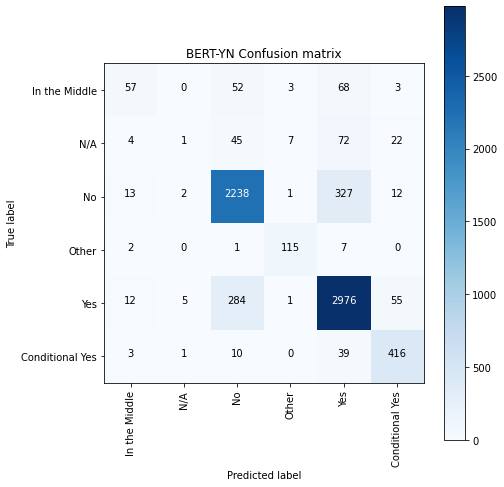

In [ ]:
from sklearn.metrics import confusion_matrix
cmat = confusion_matrix(validation_gtruths['goldstandard2'], pred_results['goldstandard2'])

import numpy as np
import itertools
import matplotlib.pyplot as plt
# https://www.kaggle.com/fuzzywizard/fashion-mnist-cnn-keras-accuracy-93
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='BERT-YN Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

plot_confusion_matrix(cmat, 
            classes = ['In the Middle','N/A','No','Other','Yes','Conditional Yes'])

Error Analysis

In [ ]:
pred_results['id'] = df_valid['id']
sub_results = pred_results
sub_results = sub_results.rename(columns={"goldstandard2": "BERT YN Q+A"})

results_df = pd.read_excel('/content/drive/MyDrive/DL Project/Results/ModelResults.xlsx')

results_df = results_df.drop(['Unnamed: 0'], axis = 1)
results_df['BERT YN Q+A'] = sub_results['BERT YN Q+A']

column_names = ["id", "question-X", "answer-Y","BERT YN Q only","BERT YN A only","BERT YN Q+A","goldstandard2"]


results_df = results_df.reindex(columns=column_names)

results_df.to_excel('/content/drive/MyDrive/DL Project/Results/ModelResults.xlsx')

In [ ]:
results_df

,id,question-X,answer-Y,BERT YN Q only,BERT YN A only,BERT YN Q+A,goldstandard2
0,30411,Do you have a Spotify account?,I don't know what I would do without it.,No,Yes,Yes,Yes
1,33629,How long have you been at your job?,It's been 5 years since I switched roles.,Other,No,Other,Other
2,14622,Do you watch a lot of romance movies?,Only the ones that are based on books.,No,"Yes, subject to some conditions","Yes, subject to some conditions","Yes, subject to some conditions"
3,29307,Are you looking for the same kind of position ...,I would like something new.,Yes,No,No,No
4,25732,Did you get your dream job?,I;m working in a different field for the time ...,No,No,No,No
...,...,...,...,...,...,...,...
6849,24637,Is it crowded and busy in that area?,It's always bustling.,Yes,Yes,Yes,Yes
6850,28626,Are you an outdoorsy type?,I would say I am,Yes,Yes,Yes,Yes
6851,11592,Are you staying some days?,I'm stay for a couple of weeks.,Yes,No,Yes,Yes
6852,24553,Do you have a CD collection?,I uploaded all of my music to a flash drive.,No,Yes,Yes,No
